## Business Problem

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

### Load dataset

In [3]:
path = r"https://drive.google.com/uc?export=download&id=13ZTYmL3E8S0nz-UKl4aaTZJaI3DVBGHM"
df  = pd.read_csv(path)

In [4]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
df.shape

(200, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [7]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


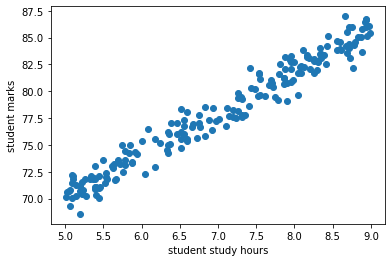

In [9]:
plt.scatter(x=df.study_hours,y=df.student_marks)
plt.xlabel("student study hours")
plt.ylabel('student marks')
plt.show()


<AxesSubplot: xlabel='study_hours', ylabel='student_marks'>

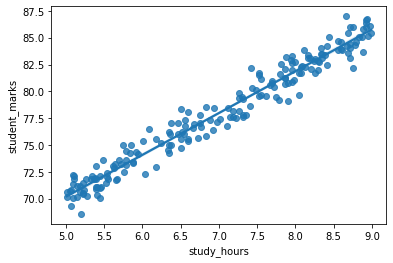

In [13]:
sns.regplot(x=df.study_hours,y=df.student_marks)

### prepare the data for Machine Learning algorithms

In [16]:
df.isnull().sum()


study_hours      5
student_marks    0
dtype: int64

In [17]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [18]:
df2=df.fillna(df.mean())

In [19]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [20]:
df2

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [23]:
# Split the data

In [33]:
x=df2.drop('student_marks',axis=1)
y=df2.drop('study_hours',axis=1)
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 1)
(160, 1)
(40, 1)
(40, 1)


### select  a model for prediction

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [37]:
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
lr.intercept_

array([50.44735504])

In [45]:
lr.coef_

array([[3.93571802]])

In [46]:
y_pred=lr.predict(x_test)

In [47]:
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [49]:
pd.DataFrame(np.c_[x_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


### Fine-tune Model

In [50]:
lr.score(x_test,y_test)

0.9514124242154464

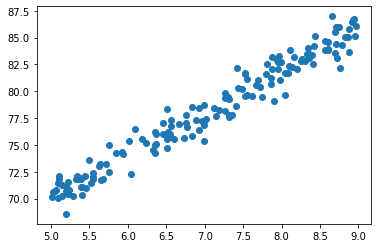

In [52]:
plt.scatter(x_train,y_train)

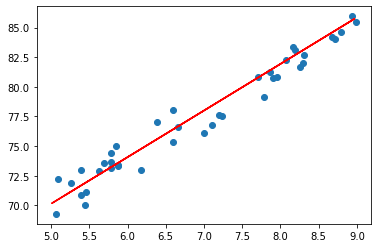

In [55]:

plt.scatter(x_test, y_test)
plt.plot(x_train, lr.predict(x_train), color = "r")

### Save the Model

In [56]:
import joblib
joblib.dump(lr, "student_mark_predictor.pkl")

['student_mark_predictor.pkl']

In [57]:
model = joblib.load("student_mark_predictor.pkl")

In [58]:
model.predict([[5]])[0][0]

c:\users\rajap\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.12594512018406